# Global Ads Analysis

Objective: We want to analyze the performance of paid media campaigns across multiple platforms to identify which channels, industries, and campaign types generate the highest return on investment (ROAS/ROI) and conversion efficiency.

This project was developed by Raquel Caetano in February 2026.

### Importing libraries

In [334]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Importing dataset

In [336]:
df = pd.read_csv(r"C:\Users\raque\Downloads\Projeto Global Ads\global_ads_performance_dataset.csv")

In [337]:
df.head(10)

,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
0,2024-01-21,Google Ads,Search,Fintech,UAE,59886,2113,0.0353,1.26,2662.38,159,16.74,4803.43,1.80
1,2024-01-22,TikTok Ads,Search,EdTech,UK,135608,5220,0.0385,1.18,6159.60,411,14.99,64126.68,10.41
2,2024-06-15,TikTok Ads,Video,Healthcare,USA,92313,5991,0.0649,0.85,5092.35,267,19.07,10489.07,2.06
3,2024-01-02,TikTok Ads,Shopping,SaaS,Germany,83953,5935,0.0707,1.32,7834.20,296,26.47,50505.07,6.45
4,2024-02-22,TikTok Ads,Search,Healthcare,UK,91807,4489,0.0489,1.93,8663.77,107,80.97,3369.53,0.39
5,2024-10-15,TikTok Ads,Search,Fintech,Canada,17666,724,0.0410,0.37,267.88,23,11.65,5220.85,19.49
6,2024-08-14,Meta Ads,Video,Fintech,USA,118252,3748,0.0317,0.42,1574.16,152,10.36,12838.56,8.16
7,2024-04-05,TikTok Ads,Search,EdTech,UAE,92939,5176,0.0557,0.66,3416.16,388,8.80,96298.69,28.19
8,2024-04-17,Meta Ads,Display,EdTech,Germany,30939,937,0.0303,0.59,552.83,63,8.78,16531.03,29.90
9,2024-11-13,Google Ads,Shopping,Fintech,USA,8748,362,0.0414,1.21,438.02,10,43.80,966.57,2.21


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1800 non-null   object 
 1   platform       1800 non-null   object 
 2   campaign_type  1800 non-null   object 
 3   industry       1800 non-null   object 
 4   country        1800 non-null   object 
 5   impressions    1800 non-null   int64  
 6   clicks         1800 non-null   int64  
 7   CTR            1800 non-null   float64
 8   CPC            1800 non-null   float64
 9   ad_spend       1800 non-null   float64
 10  conversions    1800 non-null   int64  
 11  CPA            1800 non-null   float64
 12  revenue        1800 non-null   float64
 13  ROAS           1800 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 197.0+ KB


In [339]:
df.describe()

,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,102919.018889,3962.675556,0.038427,1.572756,6171.527272,181.562222,46.608961,30101.850450,6.450367
std,55740.900690,2941.858037,0.017082,0.800872,5776.996958,171.424239,41.185556,34560.032941,6.590986
min,5059.000000,91.000000,0.008900,0.280000,58.000000,2.000000,4.800000,142.690000,0.130000
25%,54948.000000,1678.000000,0.025400,0.950000,1966.587500,59.000000,20.202500,7275.757500,2.170000
50%,103653.000000,3318.000000,0.035550,1.460000,4393.860000,130.000000,33.375000,18362.965000,4.295000
75%,150470.250000,5628.000000,0.049800,2.050000,8455.830000,252.250000,56.812500,38963.385000,8.212500
max,199650.000000,16660.000000,0.095600,3.950000,38453.320000,1151.000000,335.860000,295028.260000,49.000000


In [340]:
df.shape

(1800, 14)

### Preprocessing:

In [342]:
#checking nulls
df.isnull().sum()

date             0
platform         0
campaign_type    0
industry         0
country          0
impressions      0
clicks           0
CTR              0
CPC              0
ad_spend         0
conversions      0
CPA              0
revenue          0
ROAS             0
dtype: int64

In [343]:
#checking duplicates
df.duplicated().sum()

0

In [344]:
#checking types
df.dtypes

date              object
platform          object
campaign_type     object
industry          object
country           object
impressions        int64
clicks             int64
CTR              float64
CPC              float64
ad_spend         float64
conversions        int64
CPA              float64
revenue          float64
ROAS             float64
dtype: object

In [345]:
#transforming object to datetime
df['date'] = pd.to_datetime(df['date'])

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1800 non-null   datetime64[ns]
 1   platform       1800 non-null   object        
 2   campaign_type  1800 non-null   object        
 3   industry       1800 non-null   object        
 4   country        1800 non-null   object        
 5   impressions    1800 non-null   int64         
 6   clicks         1800 non-null   int64         
 7   CTR            1800 non-null   float64       
 8   CPC            1800 non-null   float64       
 9   ad_spend       1800 non-null   float64       
 10  conversions    1800 non-null   int64         
 11  CPA            1800 non-null   float64       
 12  revenue        1800 non-null   float64       
 13  ROAS           1800 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(4)
memory usage: 197.

##### Results:
There are no duplicate or missing values. I changed the column type 'date' from string to datetime.

In [348]:
#importing clean dataset to oracle sql
df.to_csv("ads_clean.csv", index=False)

### Exploratory Data Analysis: 

#### Initial Validation

In [351]:
#showing the amount spent per platform;
total_spend_per_platform = df.groupby('platform')['ad_spend'].sum().sort_values(ascending=False)
print("Total Spend per Platform:\n", total_spend_per_platform)

Total Spend per Platform:
 platform
Google Ads    6349268.91
TikTok Ads    2653418.51
Meta Ads      2106061.67
Name: ad_spend, dtype: float64


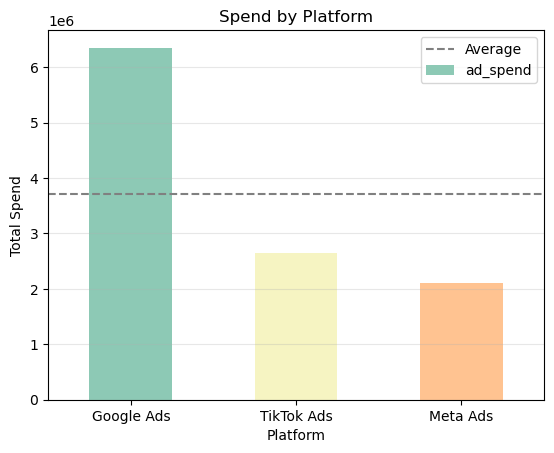

In [588]:
#Graph showing the amount spent per platform
total_spend_per_platform.plot(
    kind='bar',
    title='Spend by Platform',
    xlabel='Platform',
    ylabel='Total Spend',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = total_spend_per_platform.mean(), linestyle='--', color='gray', label='Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [353]:
#showing the revenue per platform;
total_revenue_per_platform = df.groupby('platform')['revenue'].sum().sort_values(ascending=False)
print("Total Revenue per Platform:\n",total_revenue_per_platform)

Total Revenue per Platform:
 platform
Google Ads    22033744.95
TikTok Ads    20223540.07
Meta Ads      11926045.79
Name: revenue, dtype: float64


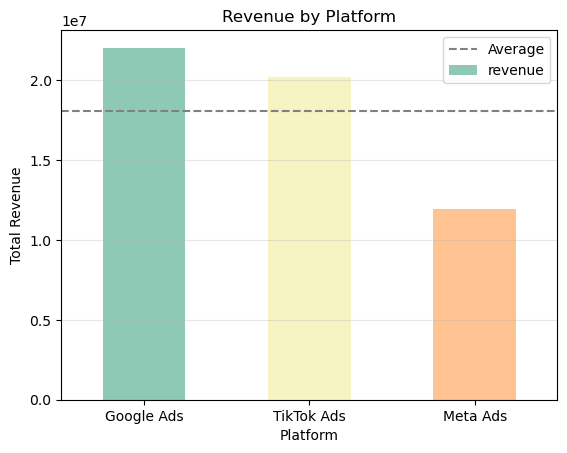

In [354]:
#Graph showing the revenue per platform
total_revenue_per_platform.plot(
    kind='bar',
    title='Revenue by Platform',
    xlabel='Platform',
    ylabel='Total Revenue',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = total_revenue_per_platform.mean(), linestyle='--', color='gray', label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [355]:
#showing the conversions per platform
total_conversions_per_platform = df.groupby('platform')['conversions'].sum().sort_values(ascending=False)
print("Total Conversions per Platform:\n", total_conversions_per_platform)

Total Conversions per Platform:
 platform
Google Ads    131098
TikTok Ads    122452
Meta Ads       73262
Name: conversions, dtype: int64


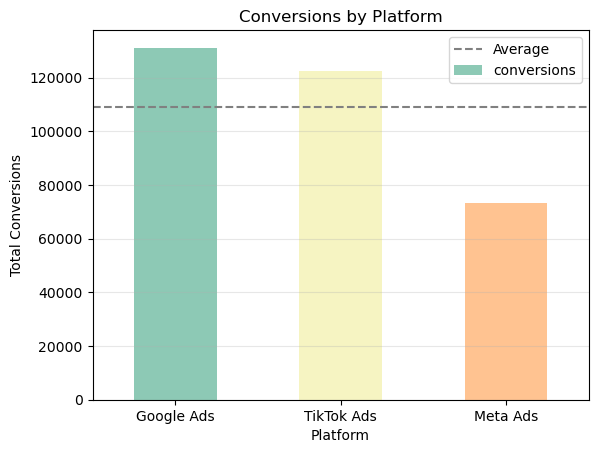

In [356]:
#Graph showing the conversions per platform
total_conversions_per_platform.plot(
    kind='bar',
    title='Conversions by Platform',
    xlabel='Platform',
    ylabel='Total Conversions',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = total_conversions_per_platform.mean(), linestyle='--', color='gray', label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

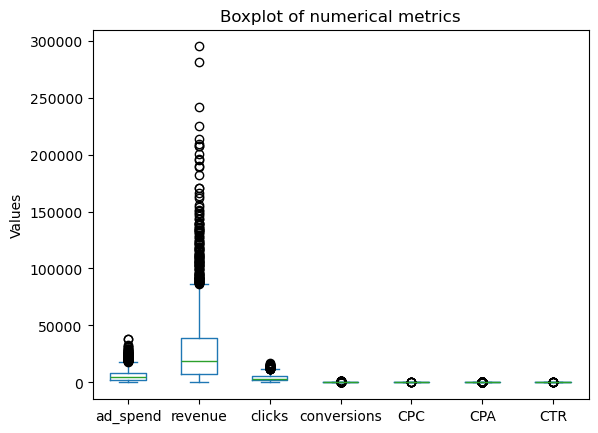

In [357]:
#checking outliers
#creating a variable with the columns to be checked
numerical_col = ['ad_spend', 'revenue', 'clicks', 'conversions', 'CPC', 'CPA', 'CTR']
df_num = df[numerical_col]

plt.figure(figsize=(12,6))  
df_num.plot(kind='box')     
plt.title('Boxplot of numerical metrics')
plt.ylabel('Values')
plt.show()


With the exception of the variables ad_spend and revenue, the others have few outliers, so we will disregard them.

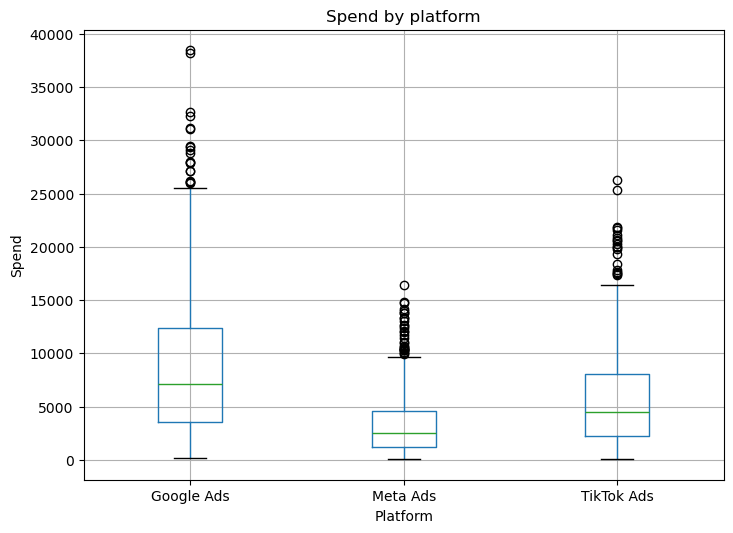

In [590]:
#checking ad_spend outlier per platform 
df.boxplot(column='ad_spend', by='platform', figsize=(8,6))
plt.title('Spend by platform')
plt.suptitle('')  
plt.xlabel('Platform')
plt.ylabel('Spend')
plt.show()

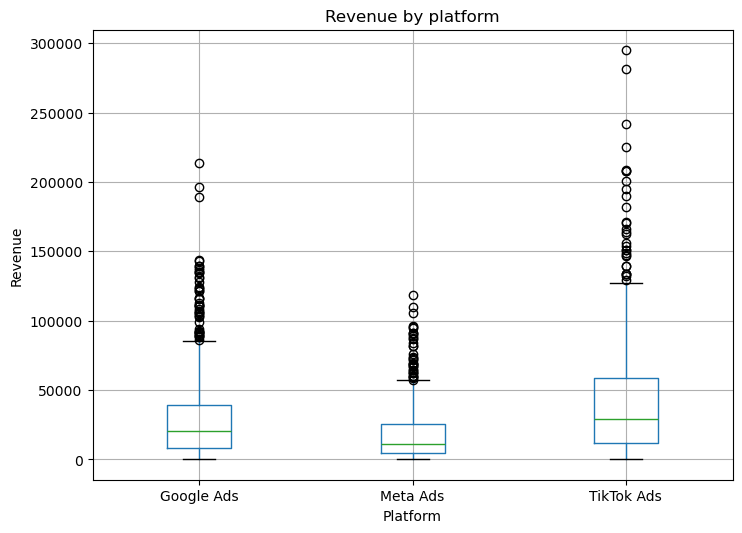

In [360]:
#checking revenue outlier per platform 
df.boxplot(column='revenue', by='platform', figsize=(8,6))
plt.title('Revenue by platform')
plt.suptitle('') 
plt.xlabel('Platform')
plt.ylabel('Revenue')
plt.show()

##### Results: 
Based on the other metrics analyzed previously, we know that Google ADS is the platform with the highest spending and revenue, so we will keep its outliers, since it may be a campaign that had a high cost and high revenue.

In [362]:
#checking correlation between all numerical variables
df_num = df.select_dtypes(include='number')

In [592]:
corr_matrix = df_num.corr()

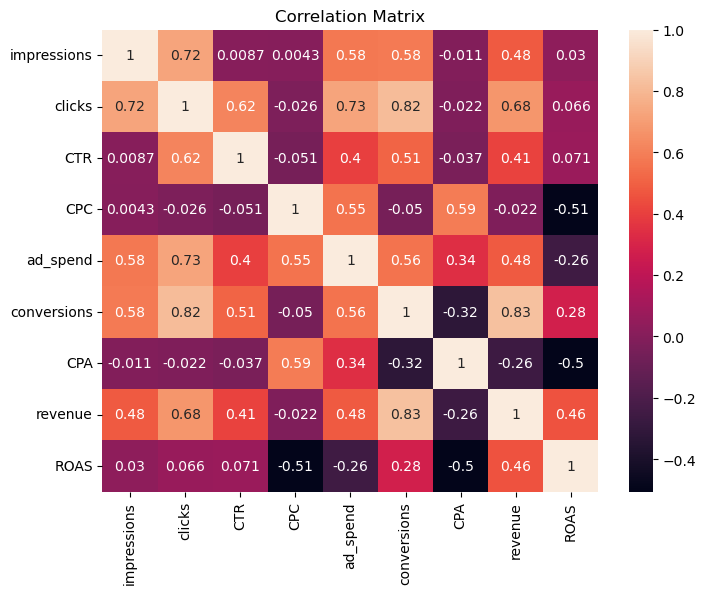

In [594]:
#heatmap of all correlations 
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

##### Results:
The correlation between spending and revenue is moderately positive, meaning that spending more tends to generate more revenue, but this doesn't explain everything; other factors are important. The correlation between clicks and conversions is 0.82, strongly positive, so the more clicks, the more conversions. CPA and ROAS have a correlation of -0.5, moderately negative; cost per acquisition increases, return decreases, meaning campaigns with lower CPA are more profitable. Revenue is strongly driven by conversions, reinforcing the importance of optimizing conversion-focused campaigns. Spending more on campaigns generates more traffic (clicks). Conversely, a high cost per click negatively impacts financial return. And finally, more impressions do not necessarily mean more clicks.

#### Funnel Metrics

In [367]:
#average CTR per platform
ctr_per_platform = df.groupby('platform')['CTR'].mean().sort_values(ascending=False)
print("Average CTR per platform:\n", ctr_per_platform)

Average CTR per platform:
 platform
TikTok Ads    0.054963
Google Ads    0.039856
Meta Ads      0.024983
Name: CTR, dtype: float64


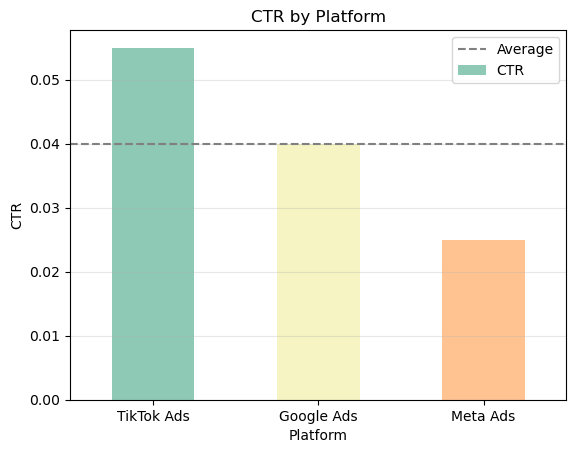

In [368]:
#Graph showing the ctr per platform; the line represents the average.
ctr_per_platform.plot(
    kind='bar',
    title='CTR by Platform',
    xlabel='Platform',
    ylabel='CTR',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = ctr_per_platform.mean(), linestyle='--', color='gray', label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [369]:
#average CTR per campaing
ctr_per_campaign = df.groupby('campaign_type')['CTR'].mean().sort_values(ascending=False)
print("Average CTR per campaign:\n", ctr_per_campaign)

Average CTR per campaign:
 campaign_type
Search      0.039426
Shopping    0.038489
Display     0.038091
Video       0.037630
Name: CTR, dtype: float64


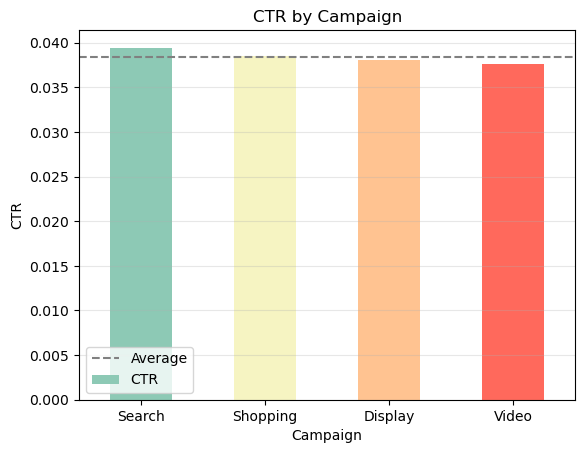

In [370]:
#Graph showing the CTR per campaign; the line represents the average.
ctr_per_campaign.plot(
    kind='bar',
    title='CTR by Campaign',
    xlabel='Campaign',
    ylabel='CTR',
    color= ['#8DC9B5','#F6F4C2', '#FFC391','#FF695C'],
    rot=0
)

plt.axhline(y = ctr_per_campaign.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [371]:
#average clicks per platform
clicks_per_platform = df.groupby('platform')['clicks'].mean().sort_values(ascending=False)
print("Average clicks per platform:\n", clicks_per_platform.round(2))

Average clicks per platform:
 platform
TikTok Ads    5777.62
Google Ads    4077.98
Meta Ads      2534.50
Name: clicks, dtype: float64


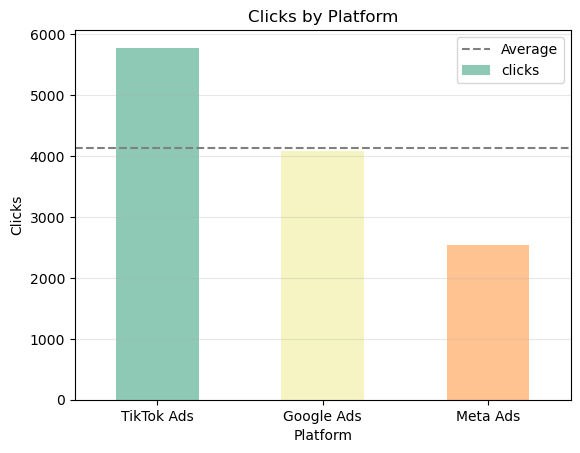

In [372]:
#Graph showing the clicks per platform; the line represents the average.
clicks_per_platform.plot(
    kind='bar',
    title='Clicks by Platform',
    xlabel='Platform',
    ylabel='Clicks',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = clicks_per_platform.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [373]:
#average clicks per campaing
clicks_per_campaign = df.groupby('campaign_type')['clicks'].mean().sort_values(ascending=False)
print("Average clicks per campaign:\n", clicks_per_campaign.round(2))

Average clicks per campaign:
 campaign_type
Shopping    3993.98
Search      3979.51
Video       3971.23
Display     3900.94
Name: clicks, dtype: float64


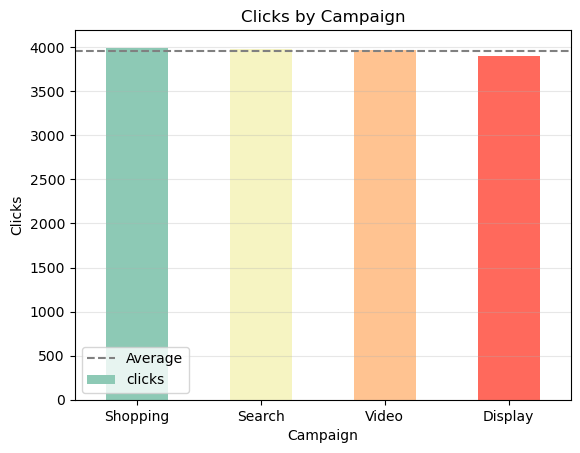

In [374]:
#Graph showing the CTR per campaign; the line represents the average.
clicks_per_campaign.plot(
    kind='bar',
    title='Clicks by Campaign',
    xlabel='Campaign',
    ylabel='Clicks',
    color= ['#8DC9B5','#F6F4C2', '#FFC391','#FF695C'],
    rot=0
)

plt.axhline(y = clicks_per_campaign.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [375]:
#average conversions per platform
conversions_per_platform = df.groupby('platform')['conversions'].mean().sort_values(ascending=False)
print("Average conversions per platform:\n", conversions_per_platform)

Average conversions per platform:
 platform
TikTok Ads    272.115556
Google Ads    182.080556
Meta Ads      116.288889
Name: conversions, dtype: float64


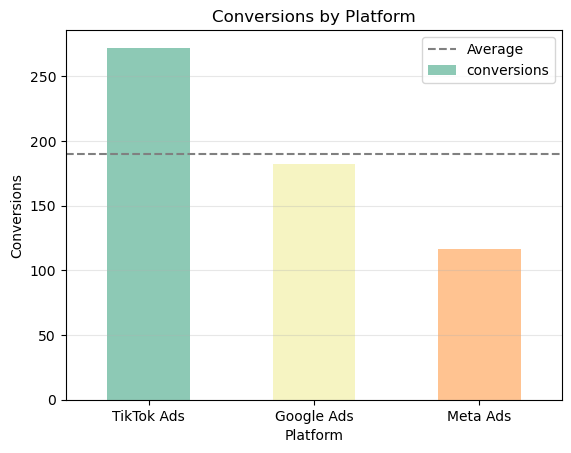

In [376]:
#Graph showing the conversions per platform; the line represents the average.
conversions_per_platform.plot(
    kind='bar',
    title='Conversions by Platform',
    xlabel='Platform',
    ylabel='Conversions',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = conversions_per_platform.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [377]:
#average conversions per campaign
conversions_per_campaign = df.groupby('campaign_type')['conversions'].mean().sort_values(ascending=False)
print("Average conversions per campaign:\n", conversions_per_campaign)

Average conversions per campaign:
 campaign_type
Search      190.023061
Display     183.021429
Shopping    179.136465
Video       173.745614
Name: conversions, dtype: float64


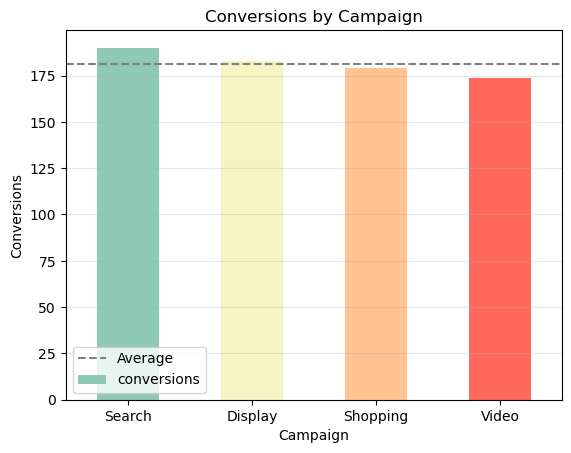

In [378]:
#Graph showing the conversion per campaign; the line represents the average.
conversions_per_campaign.plot(
    kind='bar',
    title='Conversions by Campaign',
    xlabel='Campaign',
    ylabel='Conversions',
    color= ['#8DC9B5','#F6F4C2', '#FFC391','#FF695C'],
    rot=0
)

plt.axhline(y = conversions_per_campaign.mean(), linestyle='--', color='gray', label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [379]:
#calculating conversion rate
df['conversion_rate'] = df['conversions'] / df['clicks']

In [380]:
#average conversion rate per platform
conv_rate_per_platform = df.groupby('platform')['conversion_rate'].mean().sort_values(ascending=False)
print("Average conversions rate per platform:\n", conv_rate_per_platform)

Average conversions rate per platform:
 platform
TikTok Ads    0.046168
Google Ads    0.045250
Meta Ads      0.044847
Name: conversion_rate, dtype: float64


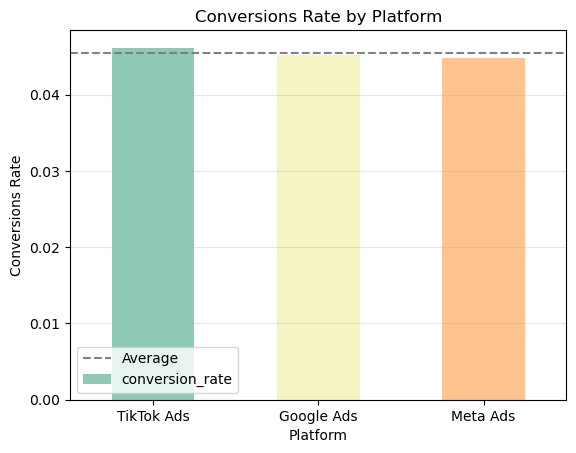

In [381]:
#Graph showing the conversions rate per platform; the line represents the average.
conv_rate_per_platform.plot(
    kind='bar',
    title='Conversions Rate by Platform',
    xlabel='Platform',
    ylabel='Conversions Rate',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = conv_rate_per_platform.mean(), linestyle='--', color='gray', label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [382]:
#average conversion rate per campaing
conv_rate_per_campaing = df.groupby('campaign_type')['conversion_rate'].mean().sort_values(ascending=False)
print("Average conversions rate per campaign:\n", conv_rate_per_campaing)

Average conversions rate per campaign:
 campaign_type
Display     0.046681
Search      0.046440
Shopping    0.044310
Video       0.043957
Name: conversion_rate, dtype: float64


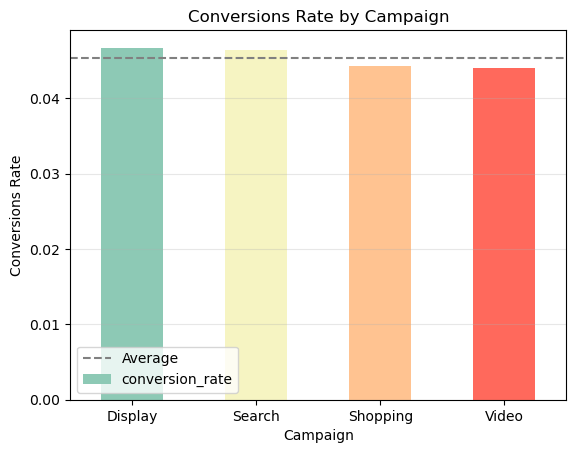

In [383]:
#Graph showing the conversion rate per campaign; the line represents the average.
conv_rate_per_campaing.plot(
    kind='bar',
    title='Conversions Rate by Campaign',
    xlabel='Campaign',
    ylabel='Conversions Rate',
    color= ['#8DC9B5','#F6F4C2', '#FFC391','#FF695C'],
    rot=0
)

plt.axhline(y = conv_rate_per_campaing.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

##### Result: 
The platform with the best average CTR is TikTok Ads, and the best campaign is Search. Furthermore, the TikTok Ads platform also performed better in average clicks, average conversion, and conversion rate overall. Regarding the campaigns, 'Shopping' had the most clicks, 'Search' had the most conversions, and 'Display' had the highest conversion rate. In other words, the best campaign varies depending on the main marketing objective.

#### Cost Metrics

In [386]:
#CPC per platform
cpc_per_platform = df.groupby('platform')['CPC'].mean().sort_values(ascending=False).round(2)
print("CPC per platform: \n",cpc_per_platform)

CPC per platform: 
 platform
Google Ads    2.15
Meta Ads      1.32
TikTok Ads    1.01
Name: CPC, dtype: float64


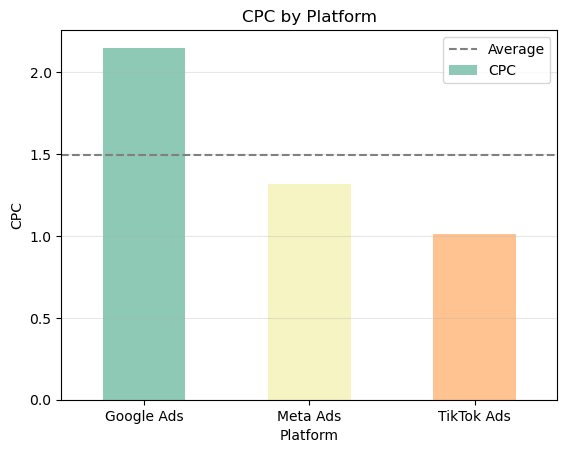

In [387]:
#Graph showing the cpc per platform; the line represents the average.
cpc_per_platform.plot(
    kind='bar',
    title='CPC by Platform',
    xlabel='Platform',
    ylabel='CPC',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = cpc_per_platform.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [388]:
#CPC per campaign
cpc_per_campaign = df.groupby('campaign_type')['CPC'].mean().sort_values(ascending=False).round(2)
print("CPC per campaign: \n",cpc_per_campaign)

CPC per campaign: 
 campaign_type
Display     1.62
Video       1.58
Shopping    1.57
Search      1.53
Name: CPC, dtype: float64


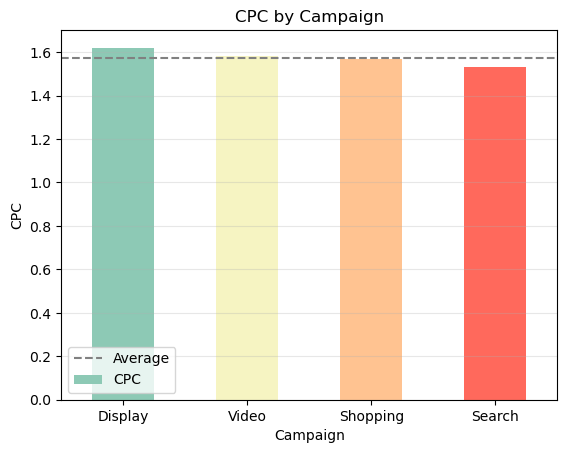

In [389]:
#Graph showing the cpc per campaign; the line represents the average.
cpc_per_campaign.plot(
    kind='bar',
    title='CPC by Campaign',
    xlabel='Campaign',
    ylabel='CPC',
    color= ['#8DC9B5','#F6F4C2', '#FFC391','#FF695C'],
    rot=0
)

plt.axhline(y = cpc_per_campaign.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [390]:
#CPA per platform
cpa_per_platform = df.groupby('platform')['CPA'].mean().sort_values(ascending=False).round(2)
print("CPA per platform: \n",cpa_per_platform)

CPA per platform: 
 platform
Google Ads    64.06
Meta Ads      39.10
TikTok Ads    29.20
Name: CPA, dtype: float64


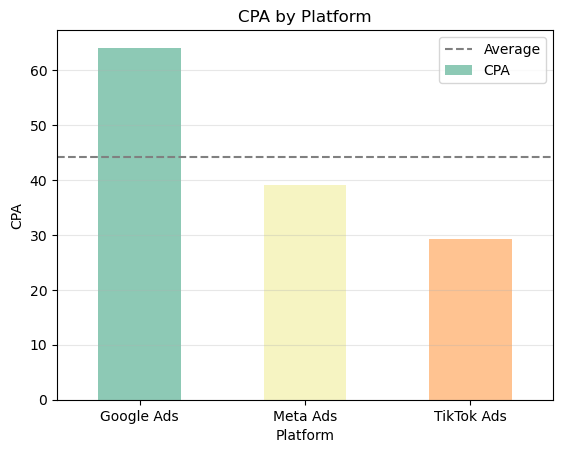

In [391]:
#Graph showing the cpA per platform; the line represents the average.
cpa_per_platform.plot(
    kind='bar',
    title='CPA by Platform',
    xlabel='Platform',
    ylabel='CPA',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = cpa_per_platform.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [392]:
#CPA per campaign
cpa_per_campaign = df.groupby('campaign_type')['CPA'].mean().sort_values(ascending=False).round(2)
print("CPA per campaign: \n",cpa_per_campaign)

CPA per campaign: 
 campaign_type
Video       48.36
Shopping    48.00
Display     45.85
Search      44.30
Name: CPA, dtype: float64


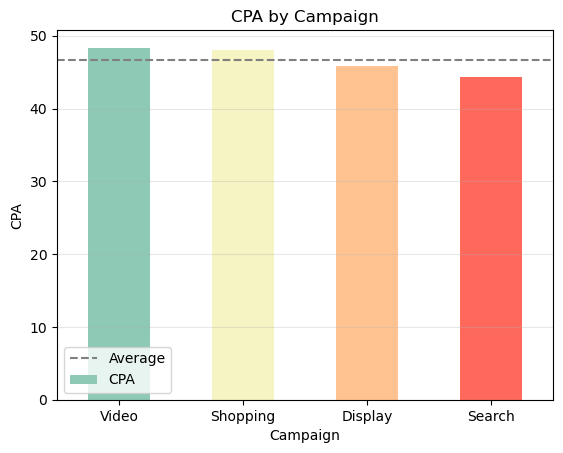

In [393]:
#Graph showing the cpa per campaign; the line represents the average.
cpa_per_campaign.plot(
    kind='bar',
    title='CPA by Campaign',
    xlabel='Campaign',
    ylabel='CPA',
    color= ['#8DC9B5','#F6F4C2', '#FFC391','#FF695C'],
    rot=0
)

plt.axhline(y = cpa_per_campaign.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [394]:
#Ad spend per platform
adspend_per_platform = df.groupby('platform')['ad_spend'].sum().sort_values(ascending=False)
print("Ad Spend per platform: \n",adspend_per_platform)

Ad Spend per platform: 
 platform
Google Ads    6349268.91
TikTok Ads    2653418.51
Meta Ads      2106061.67
Name: ad_spend, dtype: float64


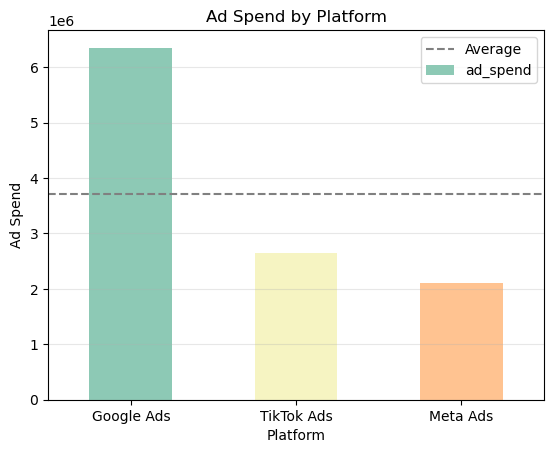

In [395]:
#Graph showing the ad spend per platform; the line represents the average.
adspend_per_platform.plot(
    kind='bar',
    title='Ad Spend by Platform',
    xlabel='Platform',
    ylabel='Ad Spend',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = adspend_per_platform.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [396]:
#Ad spend per campaign
adspend_per_campaign = df.groupby('campaign_type')['ad_spend'].sum().sort_values(ascending=False)
print("Ad Spend per campaign: \n",adspend_per_campaign)

Ad Spend per campaign: 
 campaign_type
Search      2868006.85
Shopping    2799548.64
Video       2796458.48
Display     2644735.12
Name: ad_spend, dtype: float64


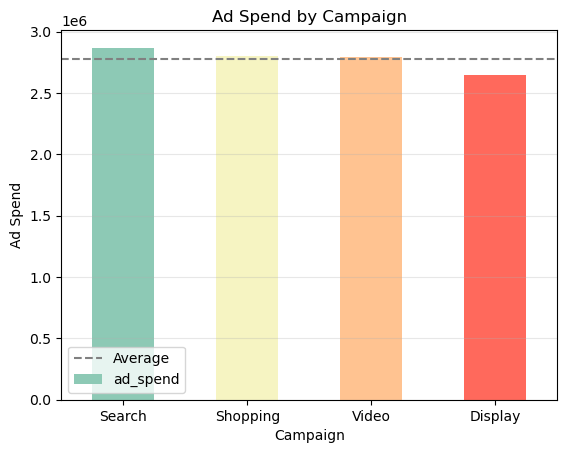

In [397]:
#Graph showing the ad spend per campaign; the line represents the average.
adspend_per_campaign.plot(
    kind='bar',
    title='Ad Spend by Campaign',
    xlabel='Campaign',
    ylabel='Ad Spend',
    color= ['#8DC9B5','#F6F4C2', '#FFC391','#FF695C'],
    rot=0
)

plt.axhline(y = adspend_per_campaign.mean(), linestyle='--', color='gray', label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

##### Results: 
The platform with the highest average CPC, CPA, and ad spend is Google Ads. Regarding the campaigns, 'Display' has the highest average CPC, 'Video' the highest average CPA, and 'Search' has the highest average ad spend.

### Revenue

In [400]:
#calculating the revenue per platform
revenue_per_platform = df.groupby('platform')['revenue'].sum().sort_values(ascending=False)
print("Total Revenue per Platform: \n",revenue_per_platform)

Total Revenue per Platform: 
 platform
Google Ads    22033744.95
TikTok Ads    20223540.07
Meta Ads      11926045.79
Name: revenue, dtype: float64


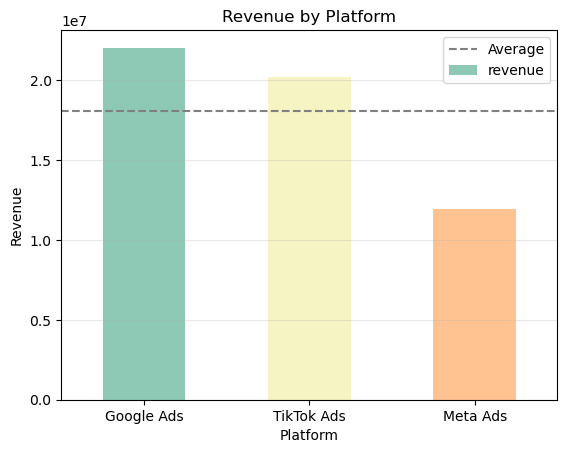

In [401]:
#Graph showing the revenue per platform; the line represents the average.
revenue_per_platform.plot(
    kind='bar',
    title='Revenue by Platform',
    xlabel='Platform',
    ylabel='Revenue',
    color= ['#8DC9B5','#F6F4C2', '#FFC391'],
    rot=0
)

plt.axhline(y = revenue_per_platform.mean(), linestyle='--', color='gray',label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [402]:
#Revenue per campaign
revenue_per_campaign = df.groupby('campaign_type')['revenue'].sum().sort_values(ascending=False)
print("Revenue per campaign: \n",revenue_per_campaign)

Revenue per campaign: 
 campaign_type
Search      15218470.85
Video       13341261.19
Shopping    12824695.60
Display     12798903.17
Name: revenue, dtype: float64


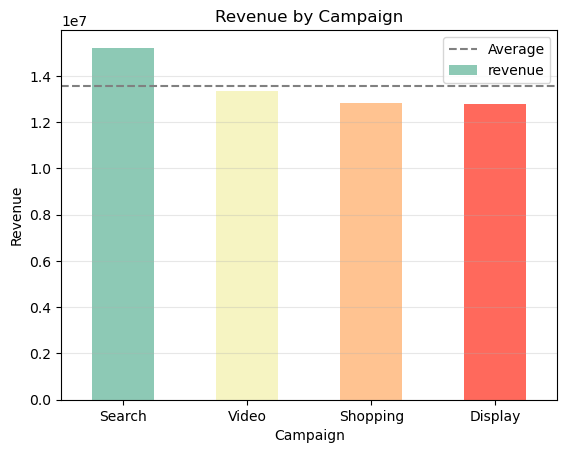

In [403]:
#Graph showing the revenue per campaign; the line represents the average.
revenue_per_campaign.plot(
    kind='bar',
    title='Revenue by Campaign',
    xlabel='Campaign',
    ylabel='Revenue',
    color= ['#8DC9B5','#F6F4C2', '#FFC391','#FF695C'],
    rot=0
)

plt.axhline(y = revenue_per_campaign.mean(), linestyle='--', color='gray', label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [404]:
#Revenue per industry
revenue_per_industry = df.groupby('industry')['revenue'].sum().sort_values(ascending=False)
print("Revenue per industry: \n",revenue_per_industry)

Revenue per industry: 
 industry
SaaS          11891991.42
EdTech        11549934.43
Healthcare    10930814.04
Fintech       10173311.23
E-commerce     9637279.69
Name: revenue, dtype: float64


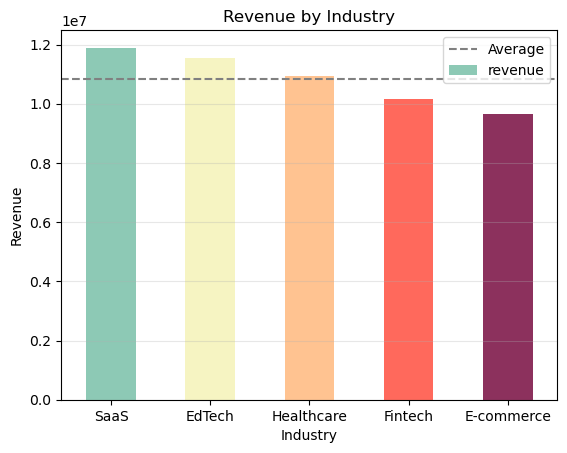

In [405]:
#Graph showing the revenue per industry; the line represents the average.
revenue_per_industry.plot(
    kind='bar',
    title='Revenue by Industry',
    xlabel='Industry',
    ylabel='Revenue',
    color= ['#8DC9B5','#F6F4C2', '#FFC391','#FF695C', '#8C315D'],
    rot=0
)

plt.axhline(y = revenue_per_industry.mean(), linestyle='--', color='gray', label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

In [406]:
#Revenue per country
revenue_per_country = df.groupby('country')['revenue'].sum().sort_values(ascending=False)
print("Revenue per country: \n",revenue_per_country)

Revenue per country: 
 country
UAE          7939594.41
Australia    7921847.84
India        7909606.26
Canada       7867323.12
Germany      7694838.61
UK           7659544.29
USA          7190576.28
Name: revenue, dtype: float64


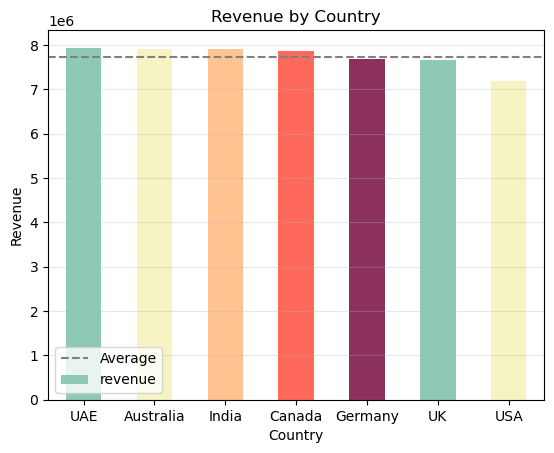

In [602]:
#Graph showing the revenue per industry; the line represents the average.
revenue_per_country.plot(
    kind='bar',
    title='Revenue by Country',
    xlabel='Country',
    ylabel='Revenue',
    color= ['#8DC9B5','#F6F4C2', '#FFC391','#FF695C', '#8C315D', '#8DC9B5', '#F6F4C2'],
    rot=0
)

plt.axhline(y = revenue_per_country.mean(), linestyle='--', color='gray', label= 'Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.show()

##### Results:
Google Ads and the "Search" campaign have the highest total revenue. The industry with the highest revenue is SaaS. And the country with the most revenue is the UAE, followed by Australia.

### Financial Efficiency per Platform

In [617]:
#calculating the profit
df['profit'] = df['revenue'] - df['ad_spend']

In [411]:
#calculating the profit per platform
profit_per_platform = (
    df.groupby('platform')['profit'].sum().sort_values(ascending=False)
)

print('Profit per Platform: \n', profit_per_platform)

Profit per Platform: 
 platform
TikTok Ads    17570121.56
Google Ads    15684476.04
Meta Ads       9819984.12
Name: profit, dtype: float64


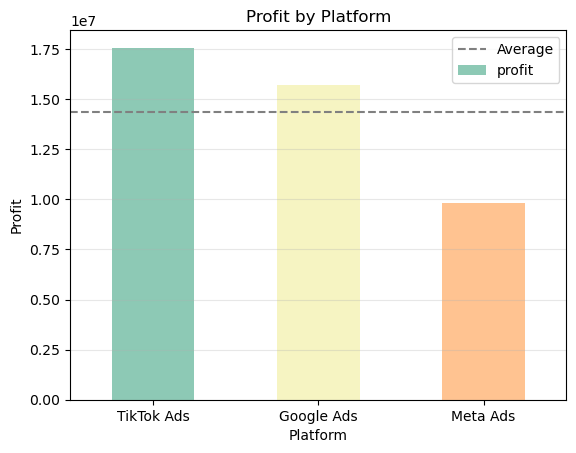

In [412]:
#Graph showing the profit per platform; the line represents the average.
profit_per_platform.plot(
    kind='bar',
    title='Profit by Platform',
    xlabel='Platform',
    ylabel='Profit',
    color=['#8DC9B5','#F6F4C2','#FFC391'],
    rot=0
)

plt.axhline(y=profit_per_platform.mean(), linestyle='--', color='gray', label='Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.show()

In [609]:
#ROAS per platform
roas_per_platform = (
    df.groupby('platform')[['revenue', 'ad_spend']]
      .sum()
)

roas_per_platform['ROAS'] = (
    roas_per_platform['revenue'] / roas_per_platform['ad_spend']
)

roas_per_platform = roas_per_platform['ROAS'].sort_values(ascending=False).round(2)


print("ROAS per platform:\n", roas_per_platform)


ROAS per platform:
 platform
TikTok Ads    7.62
Meta Ads      5.66
Google Ads    3.47
Name: ROAS, dtype: float64


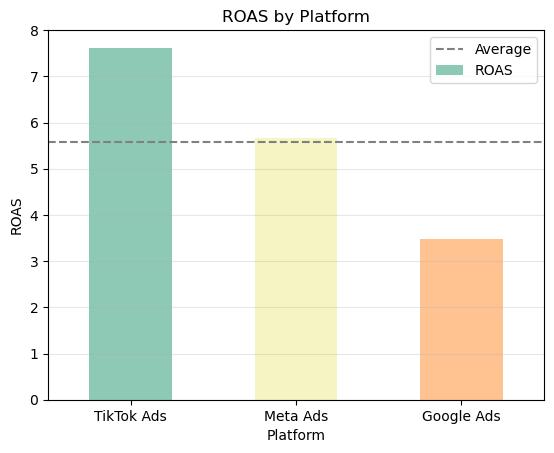

In [414]:
roas_per_platform.plot(
    kind='bar',
    title='ROAS by Platform',
    xlabel='Platform',
    ylabel='ROAS',
    color=['#8DC9B5','#F6F4C2','#FFC391'],
    rot=0
)

plt.axhline(y=roas_per_platform.mean(), linestyle='--', color='gray', label='Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.show()

In [415]:
#calculating ROI per platform
roi_per_platform = (
    df.groupby('platform')[['revenue', 'ad_spend']]
      .sum()
)

roi_per_platform['ROI'] = (
    (roi_per_platform['revenue'] - roi_per_platform['ad_spend']) / 
    roi_per_platform['ad_spend']
)

roi_per_platform = roi_per_platform['ROI'].sort_values(ascending=False).round(2)


print("ROI per platform:\n", roi_per_platform)

ROI per platform:
 platform
TikTok Ads    6.62
Meta Ads      4.66
Google Ads    2.47
Name: ROI, dtype: float64


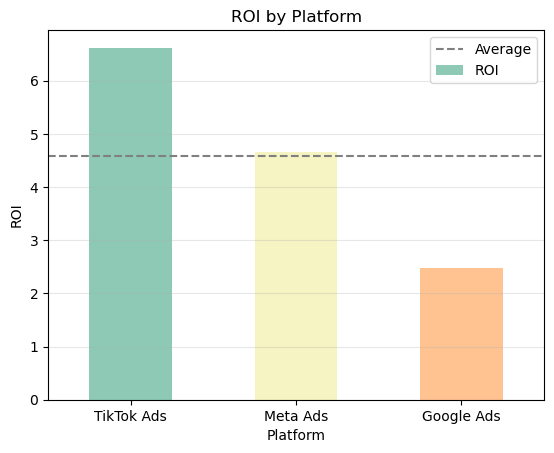

In [416]:
#graph roi per platform
roi_per_platform.plot(
    kind='bar',
    title='ROI by Platform',
    xlabel='Platform',
    ylabel='ROI',
    color=['#8DC9B5','#F6F4C2','#FFC391'],
    rot=0
)

plt.axhline(y=roi_per_platform.mean(), linestyle='--', color='gray', label='Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.show()

In [417]:
#calculating revenue per click per platform
revenue_per_click = (
    df.groupby('platform')[['revenue', 'clicks']]
      .sum()
)

revenue_per_click['revenue_per_click'] = (
    revenue_per_click['revenue'] /  revenue_per_click['clicks']
)

revenue_per_click = revenue_per_click['revenue_per_click'].sort_values(ascending=False).round(2)


print("revenue per Click:\n", revenue_per_click)

revenue per Click:
 platform
TikTok Ads    7.78
Google Ads    7.50
Meta Ads      7.47
Name: revenue_per_click, dtype: float64


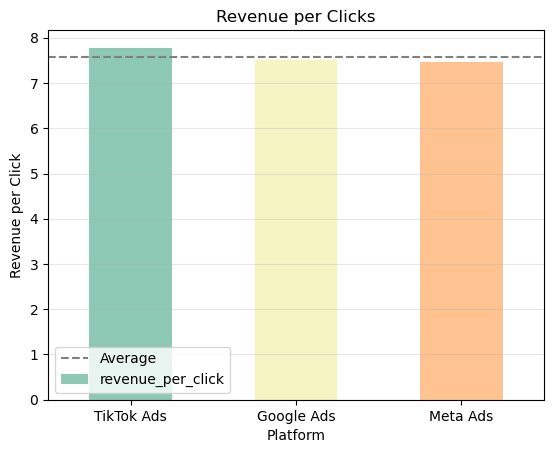

In [418]:
#graph revenue per click
revenue_per_click.plot(
    kind='bar',
    title='Revenue per Clicks',
    xlabel='Platform',
    ylabel='Revenue per Click',
    color=['#8DC9B5','#F6F4C2','#FFC391'],
    rot=0
)

plt.axhline(y=revenue_per_click.mean(), linestyle='--', color='gray', label='Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.show()

In [419]:
#calculating revenue per conversion per platform
revenue_per_conversion = (
    df.groupby('platform')[['revenue', 'conversions']]
      .sum()
)

revenue_per_conversion['revenue_per_conversion'] = (
    revenue_per_conversion['revenue'] /  revenue_per_conversion['conversions']
)

revenue_per_conversion = revenue_per_conversion['revenue_per_conversion'].sort_values(ascending=False).round(2)


print("Revenue per Conversion:\n", revenue_per_conversion)

Revenue per Conversion:
 platform
Google Ads    168.07
TikTok Ads    165.15
Meta Ads      162.79
Name: revenue_per_conversion, dtype: float64


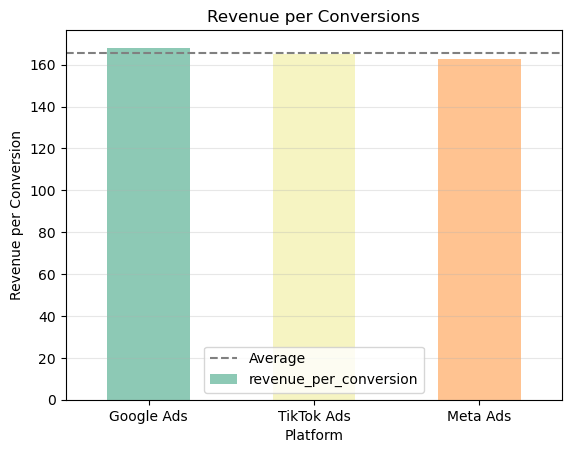

In [420]:
#graph revenue per conversion 
revenue_per_conversion.plot(
    kind='bar',
    title='Revenue per Conversions',
    xlabel='Platform',
    ylabel='Revenue per Conversion',
    color=['#8DC9B5','#F6F4C2','#FFC391'],
    rot=0
)

plt.axhline(y=revenue_per_conversion.mean(), linestyle='--', color='gray', label='Average')
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.show()

##### Results: 
TikTok Ads has the highest profit, ROAS, ROI, and revenue per click. Google Ads wins in revenue per conversion.

### Strategic Segmentation

In [504]:
#function to calculate roas and automate heatmap
def heatmap_ratio(df, row, col, num, den, title):
    
    pivot = pd.pivot_table(
        df,
        values=[num, den],
        index=row,
        columns=col,
        aggfunc='sum'
    )
    
    ratio = pivot[num] / pivot[den]
    ratio = ratio.sort_values(by=ratio.columns[0], ascending=False)

    
    plt.figure(figsize=(8,5))
    sns.heatmap(ratio, annot=True, fmt='.2f')
    plt.title(title)
    plt.show()

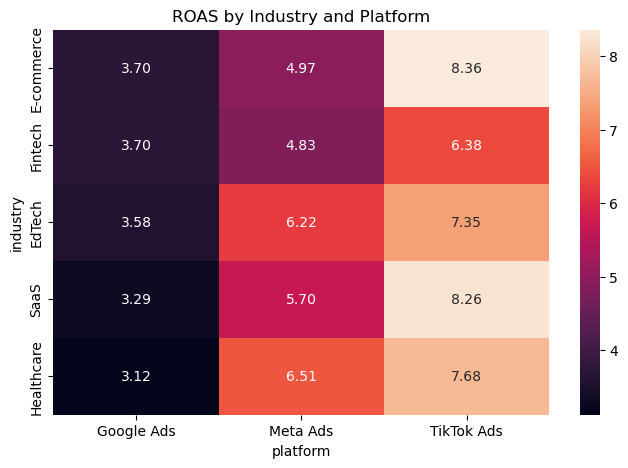

In [506]:
#heatmap platformxindustry
heatmap_ratio(
    df,
    row='industry',
    col='platform',
    num='revenue',
    den='ad_spend',
    title='ROAS by Industry and Platform'
)

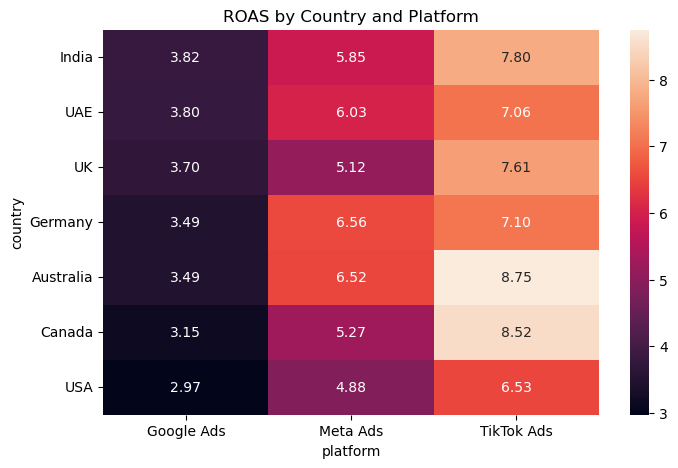

In [508]:
#country x platform
heatmap_ratio(
    df,
    row='country',
    col='platform',
    num='revenue',
    den='ad_spend',
    title='ROAS by Country and Platform'
)

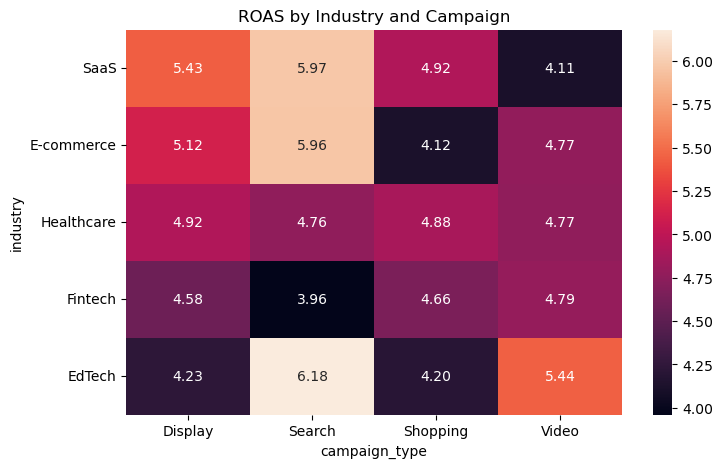

In [510]:
#campaign x industry
heatmap_ratio(
    df,
    row='industry',
    col='campaign_type',
    num='revenue',
    den='ad_spend',
    title='ROAS by Industry and Campaign'
)

##### Results: usar palavra eficiencia, roas calcula eficiencia


### Time/Seasonality

In [529]:
#calculating daily values
daily_metrics = (
    df.groupby('date')[['ad_spend','revenue', 'conversions']].sum().sort_index()
)

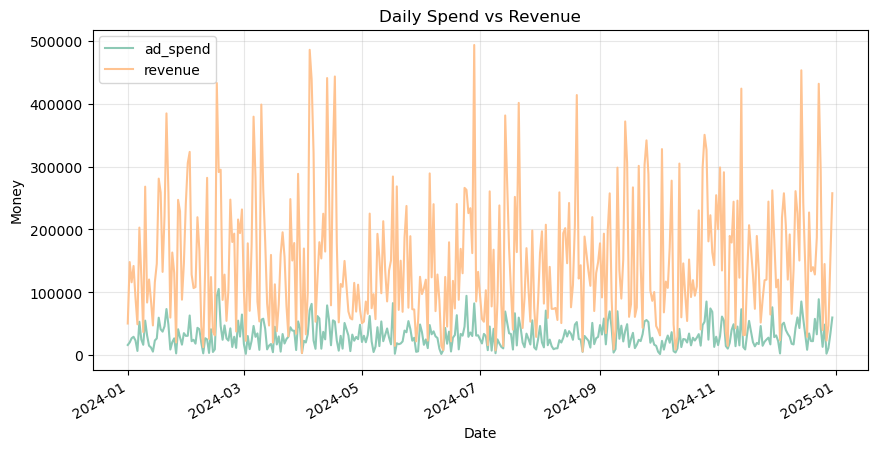

In [576]:
daily_metrics[['ad_spend','revenue']].plot(
    figsize=(10,5),
    color=['#8DC9B5','#FFC391']
)

plt.title('Daily Spend vs Revenue')
plt.xlabel('Date')
plt.ylabel('Money')
plt.grid(alpha=0.3)
plt.show()

##### Results: 
The amount spent on ads varies, but there are no significant spikes in spending. Revenue varies, with certain peaks such as in April, July, and January, and along with it, the amount spent also increases slightly, but nothing that justifies the higher revenue during that period.

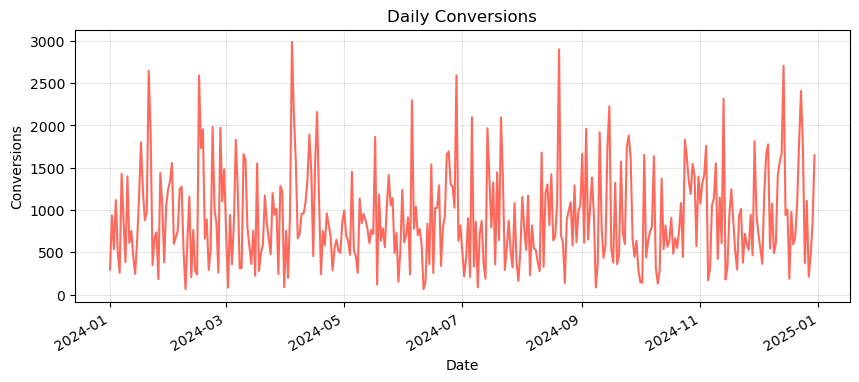

In [574]:
daily_metrics['conversions'].plot(
    figsize=(10,4),
    color=('#FF695C')
)

plt.title('Daily Conversions')
plt.xlabel('Date')
plt.ylabel('Conversions')
plt.grid(alpha=0.3)
plt.show()

##### Results: 
Conversions peak in April, September, and January. This correlates with higher revenue.

In [578]:
#calculating monthly values
monthly_metrics = (df.set_index('date')[['ad_spend','revenue','conversions']].resample('ME').sum())

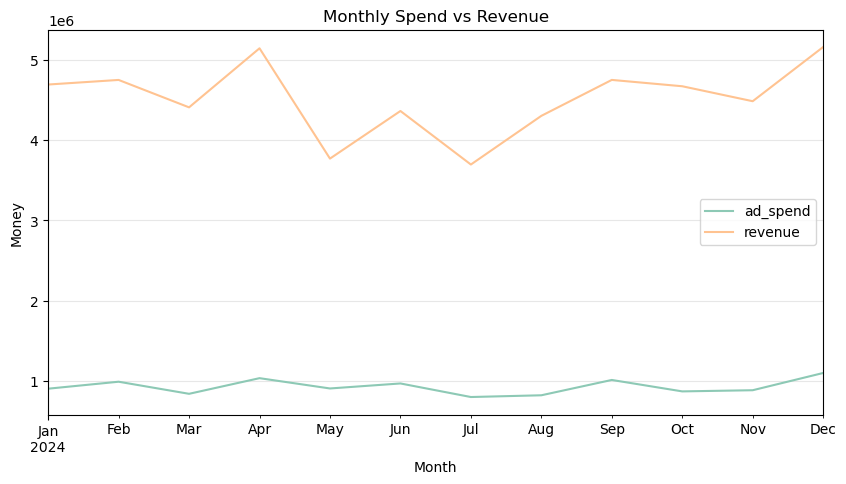

In [580]:
monthly_metrics[['ad_spend','revenue']].plot(
    figsize=(10,5),
    color=['#8DC9B5','#FFC391']
)

plt.title('Monthly Spend vs Revenue')
plt.xlabel('Month')
plt.ylabel('Money')
plt.grid(alpha=0.3)
plt.show()

##### Results:
Regarding monthly figures, revenue continues to peak in April and then decline. It rises again in September and continues to grow. The amount spent on advertising does not vary significantly.

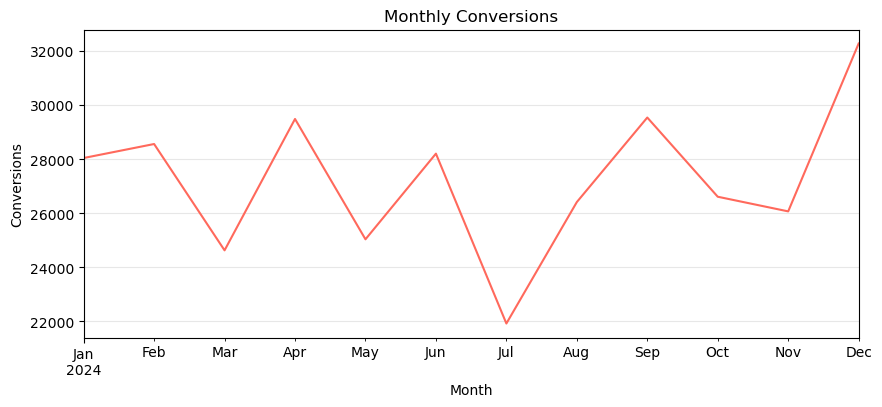

In [582]:
monthly_metrics['conversions'].plot(
    figsize=(10,4),
    color=('#FF695C')
)

plt.title('Monthly Conversions')
plt.xlabel('Month')
plt.ylabel('Conversions')
plt.grid(alpha=0.3)
plt.show()

##### Results: 
Conversions drop in March, then increase in April, with a drop in May and an increase in June, followed by a sharp drop in July, then a sharp rise in August before stabilizing. The pattern is one month with decreased conversions, the next with increased conversions. The biggest peak is in December.

In [615]:
#importing datase to power bi
df.to_csv("ads_finish.csv", index=False)

# 📊 Conclusion of the Exploratory Analysis

## Objective
To identify which paid media platform presents the best financial performance, considering cost, revenue, and efficiency.

---

## Main Findings

### 💰 Investment
- The investment was distributed among Google Ads, Meta Ads, and TikTok Ads.

- Some platforms showed a higher volume of spending, but this did not necessarily translate into a better return.

### 📈 Revenue
- TikTok Ads showed high revenue generation even with a lower average cost per click and acquisition.

- Google Ads generated volume, but with higher costs.

### ⚡ Efficiency
Performance metrics showed clear differences:

- **ROAS**: TikTok > Meta > Google

- **ROI**: TikTok > Meta > Google

- **CPC**: TikTok lower cost

- **CPA**: TikTok lower cost

---

## 🎯 Final Conclusion

The **TikTok Ads** platform demonstrated the best financial efficiency, combining:

✔ Higher return on investment (ROI)
✔ Higher return on ad spend (ROAS)
✔ Lower cost per click (CPC)
✔ Lower cost per acquisition (CPA)

This indicates that TikTok converts investment into revenue better, being the most profitable platform for the analyzed campaigns.

---

## 🚀 Suggested Next Steps
- Reallocate more budget to TikTok Ads
- Test industry/country targeting
- Investigate monthly seasonality
- In-depth campaign analysis

---

📌 Tools used:

- Python (Pandas, Matplotlib, Seaborn)
- SQL
- Power BI
